# Auswertung B3.1

In [1]:
using CSV
using DataFrames
using Plots
using LaTeXStrings
using Measurements
using Statistics

## Rechnungen zur Vorbereitung

In [2]:
T_12 = 30.08 * 365.25 * 24 * 60 * 60 # s

9.492526079999999e8

In [3]:
log(2) / T_12

7.302030826339804e-10

## 0: Rohe Messdaten

##### Sample 6, 500 V, 45min:

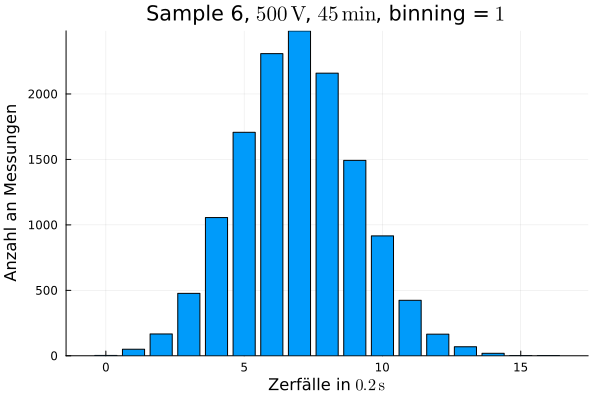

In [4]:
# ΔT = 0.2, binning = 1
zerfälle_6_500_1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
anzahl_6_500_1 = [3,50,167,477,1056,1707,2308,2482,2159,1493,916,424,165,69,19,2,2]
plot(bar(zerfälle_6_500_1,anzahl_6_500_1,label=""), title=L"Sample 6, $500\mathrm{\,V}$, $45\mathrm{\,min}$, binning = $1$")
xlabel!(L"Zerfälle in $0.2\mathrm{\,s}$")
ylabel!("Anzahl an Messungen")

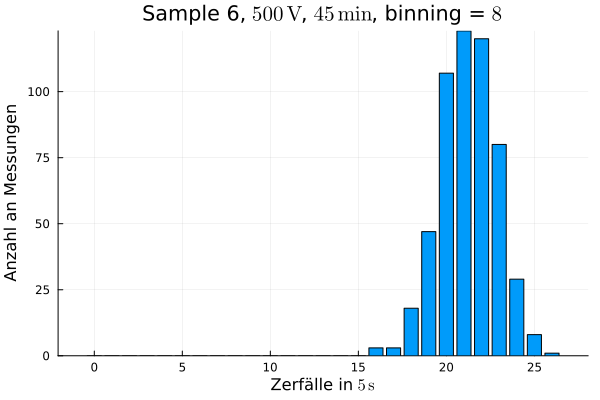

In [5]:
# ΔT = 5s, binning = 8
zerfälle_6_500_2 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]
anzahl_6_500_2 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,18,47,107,123,120,80,29,8,1]
plot(bar(zerfälle_6_500_2,anzahl_6_500_2,label=""), title=L"Sample 6, $500\mathrm{\,V}$, $45\mathrm{\,min}$, binning = $8$")
xlabel!(L"Zerfälle in $5\mathrm{\,s}$")
ylabel!("Anzahl an Messungen")

##### Sample 6, 600V, 45min:

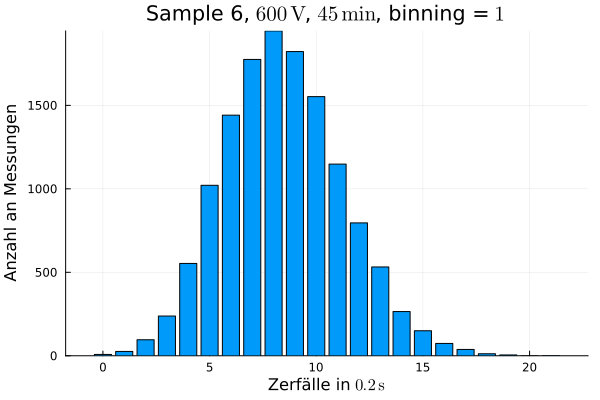

In [6]:
# ΔT = 0.2s, binning = 1
zerfälle_6_600_1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
anzahl_6_600_1 = [8,26,96,238,553,1021,1441,1775,1946,1822,1552,1148,796,532,265,150,74,38,12,5,0,1]
plot(bar(zerfälle_6_600_1,anzahl_6_600_1,label=""), title=L"Sample 6, $600\mathrm{\,V}$, $45\mathrm{\,min}$, binning = $1$")
xlabel!(L"Zerfälle in $0.2\mathrm{\,s}$")
ylabel!("Anzahl an Messungen")

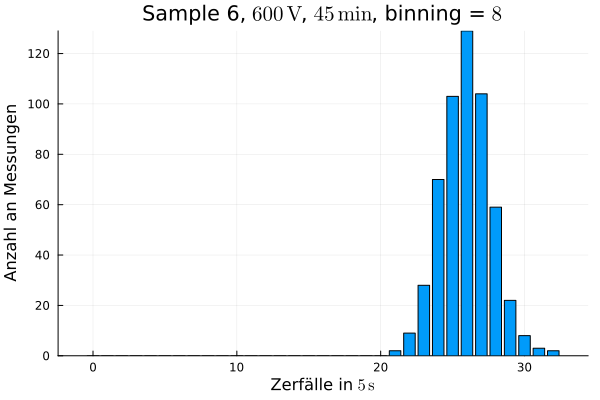

In [7]:
# ΔT = 5s, binning = 8
zerfälle_6_600_2 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32]
anzahl_6_600_2 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,9,28,70,103,129,104,59,22,8,3,2]
plot(bar(zerfälle_6_600_2,anzahl_6_600_2,label=""), title=L"Sample 6, $600\mathrm{\,V}$, $45\mathrm{\,min}$, binning = $8$")
xlabel!(L"Zerfälle in $5\mathrm{\,s}$")
ylabel!("Anzahl an Messungen")

##### Sample 6+7, 500V, 45min:

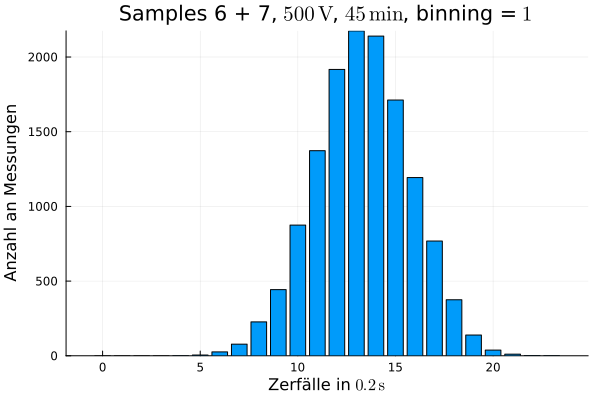

In [8]:
# ΔT = 0.2s, binning = 1
zerfälle_6und7_500_1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
anzahl_6und7_500_1 = [0,0,0,0,1,5,26,78,227,443,875,1373,1917,2175,2140,1712,1193,768,375,139,38,11,2,1]
plot(bar(zerfälle_6und7_500_1,anzahl_6und7_500_1,label=""), title=L"Samples 6 + 7, $500\mathrm{\,V}$, $45\mathrm{\,min}$, binning = $1$")
xlabel!(L"Zerfälle in $0.2\mathrm{\,s}$")
ylabel!("Anzahl an Messungen")

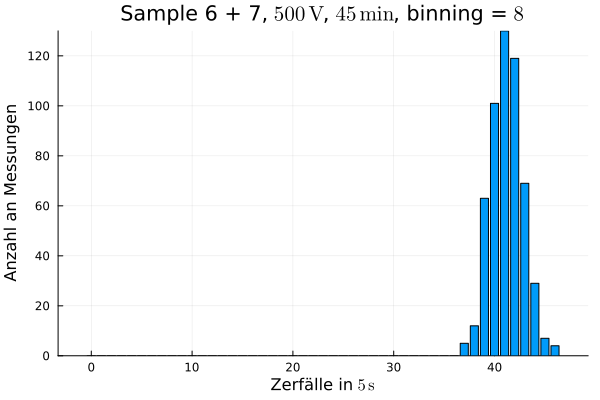

In [9]:
# ΔT = 5s, binning = 8
zerfälle_6und7_500_2 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,
    35,36,37,38,39,40,41,42,43,44,45,46]
anzahl_6und7_500_2 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,12,63,101,130,119,69,
    29,7,4]
plot(bar(zerfälle_6und7_500_2,anzahl_6und7_500_2,label=""), title=L"Sample 6 + 7, $500\mathrm{\,V}$, $45\mathrm{\,min}$, binning = $8$")
xlabel!(L"Zerfälle in $5\mathrm{\,s}$")
ylabel!("Anzahl an Messungen")

## 1: Poisson-Verteilung

In [10]:
# Poissonverteilung:
lambda = 10 # (Testwert) Mittelwert lambda
N = 10 # (Testwert) Normierungsfaktor N = Summe der Höhe aller Balken
P(n) = N * lambda^big(n) * exp(-lambda) / factorial(big(n))

P (generic function with 1 method)

Sample 6, 500V, 45min, ΔT = 0.2s, binning = 1:

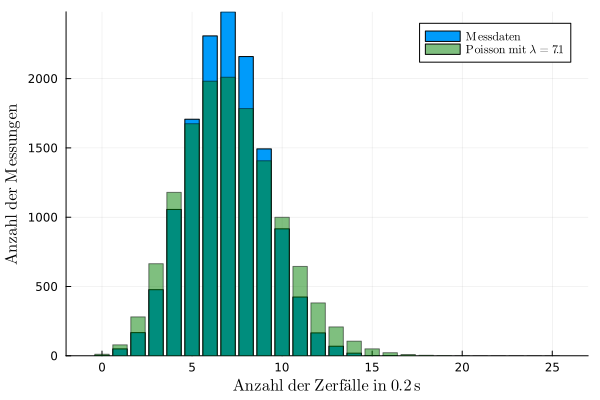

In [11]:
# Messdaten mit ΔT = 0.2, binning = 1
zerfälle_6_500_1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
anzahl_6_500_1 = [3,50,167,477,1056,1707,2308,2482,2159,1493,916,424,165,69,19,2,2]

# Passende Poissonverteilung:
lambda = 7.1
N = sum(anzahl_6_500_1)
P(n) = N * lambda^big(n) * exp(-lambda) / factorial(big(n))

#Plot
poisson1 = bar(zerfälle_6_500_1,anzahl_6_500_1,label=L"\mathrm{Messdaten}")
bar!(0:25,P,color=:green,label=LaTeXString("\$\\mathrm{Poisson\\ mit\\ } \\lambda = $lambda\$"),alpha=0.5)
xlabel!(L"\mathrm{Anzahl\ der\ Zerfälle\ in\ }0.2\mathrm{\,s}")
ylabel!(L"\mathrm{Anzahl\ der\ Messungen}")

In [12]:
savefig(poisson1, "../../media/B3.1/poisson1.pdf");

Sample 6, 600V, 45min, ΔT = 0.2s, binning = 1:

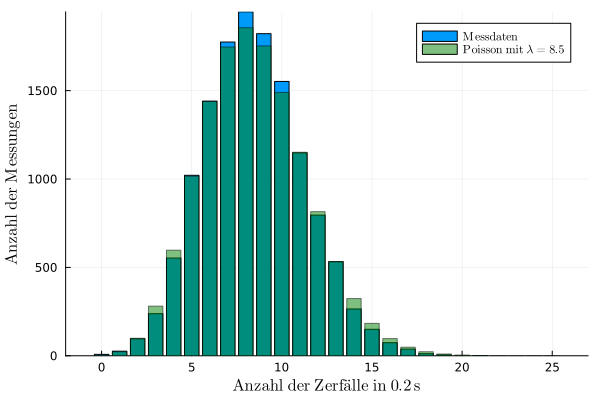

In [13]:
# Messdaten mit ΔT = 0.2s, binning = 1
zerfälle_6_600_1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
anzahl_6_600_1 = [8,26,96,238,553,1021,1441,1775,1946,1822,1552,1148,796,532,265,150,74,38,12,5,0,1]

# Passende Poissonverteilung:
lambda = 8.5
N = sum(anzahl_6_600_1)
P(n) = N * lambda^big(n) * exp(-lambda) / factorial(big(n))

# Plot
poisson2 = bar(zerfälle_6_600_1,anzahl_6_600_1,label=L"\mathrm{Messdaten}")
bar!(0:25,P,color=:green,label=LaTeXString("\$\\mathrm{Poisson\\ mit\\ } \\lambda = $lambda\$"),alpha=0.5)
xlabel!(L"\mathrm{Anzahl\ der\ Zerfälle\ in\ }0.2\mathrm{\,s}")
ylabel!(L"\mathrm{Anzahl\ der\ Messungen}")

In [14]:
savefig(poisson2, "../../media/B3.1/poisson2.pdf");

Sample 6 + 7, 500V, 45min, ΔT = 0.2s, binning = 1:

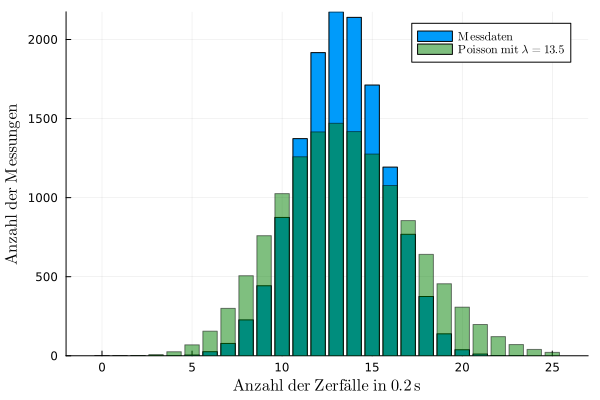

In [15]:
# Messdaten mit ΔT = 0.2s, binning = 1
zerfälle_6und7_500_1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
anzahl_6und7_500_1 = [0,0,0,0,1,5,26,78,227,443,875,1373,1917,2175,2140,1712,1193,768,375,139,38,11,2,1]

# Passende Poissonverteilung:
lambda = 13.5
N = sum(anzahl_6und7_500_1)
P(n) = N * lambda^big(n) * exp(-lambda) / factorial(big(n))

# Plot
poisson3 = bar(zerfälle_6und7_500_1,anzahl_6und7_500_1,label=L"\mathrm{Messdaten}")
bar!(0:25,P,color=:green,label=LaTeXString("\$\\mathrm{Poisson\\ mit\\ } \\lambda = $lambda\$"),alpha=0.5)
xlabel!(L"\mathrm{Anzahl\ der\ Zerfälle\ in\ }0.2\mathrm{\,s}")
ylabel!(L"\mathrm{Anzahl\ der\ Messungen}")

In [16]:
savefig(poisson3, "../../media/B3.1/poisson3.pdf");

Alle Poisson-Verteilungen zusammen:

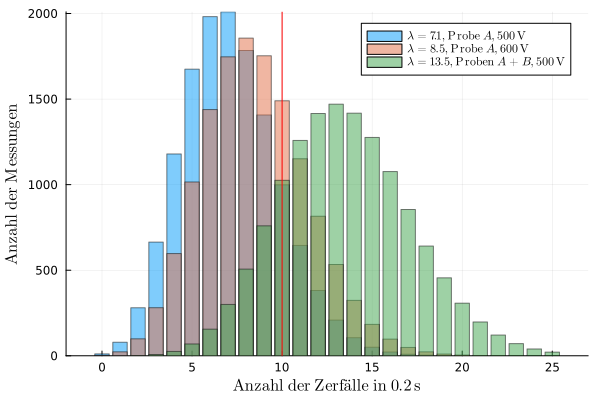

In [17]:
# Messdaten mit ΔT = 0.2, binning = 1
zerfälle_6_500_1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
anzahl_6_500_1 = [3,50,167,477,1056,1707,2308,2482,2159,1493,916,424,165,69,19,2,2]

# Passende Poissonverteilung:
lambda = 7.1
N = sum(anzahl_6_500_1)
P(n) = N * lambda^big(n) * exp(-lambda) / factorial(big(n))

#Plot
allePoisson = bar(0:25,P,label=LaTeXString("\$\\lambda = $lambda, \\mathrm{Probe\\ } A, 500\\mathrm{\\,V}\$"),alpha=0.5)

# Messdaten mit ΔT = 0.2s, binning = 1
zerfälle_6_600_1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
anzahl_6_600_1 = [8,26,96,238,553,1021,1441,1775,1946,1822,1552,1148,796,532,265,150,74,38,12,5,0,1]

# Passende Poissonverteilung:
lambda = 8.5
N = sum(anzahl_6_600_1)
P(n) = N * lambda^big(n) * exp(-lambda) / factorial(big(n))

# Plot
bar!(0:25,P,label=LaTeXString("\$\\lambda = $lambda, \\mathrm{Probe\\ } A, 600\\mathrm{\\,V}\$"),alpha=0.5)

# Messdaten mit ΔT = 0.2s, binning = 1
zerfälle_6und7_500_1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
anzahl_6und7_500_1 = [0,0,0,0,1,5,26,78,227,443,875,1373,1917,2175,2140,1712,1193,768,375,139,38,11,2,1]

# Passende Poissonverteilung:
lambda = 13.5
N = sum(anzahl_6und7_500_1)
P(n) = N * lambda^big(n) * exp(-lambda) / factorial(big(n))

# Plot
bar!(0:25,P,label=LaTeXString("\$\\lambda = $lambda, \\mathrm{Proben\\ } A+B, 500\\mathrm{\\,V}\$"),alpha=0.5)

xlabel!(L"\mathrm{Anzahl\ der\ Zerfälle\ in\ }0.2\mathrm{\,s}")
ylabel!(L"\mathrm{Anzahl\ der\ Messungen}")

# Plot Faustregel
vline!([10], color=:red, label="")

In [18]:
savefig(allePoisson, "../../media/B3.1/allePoisson.pdf");

## 2: Gaußverteilung

In [19]:
n = 8 # Binning (für alle Messungen gleich)
Δt = 5 # (für alle Messungen gleich)

G(x, m, F, n=8) = 1/sqrt(2 * pi * m) * F * sqrt(n) * exp(- (x - m)^2 / (2 * m / n))

G (generic function with 2 methods)

Sample 6, 500V, 45min, ΔT = 5s, binning = 8:

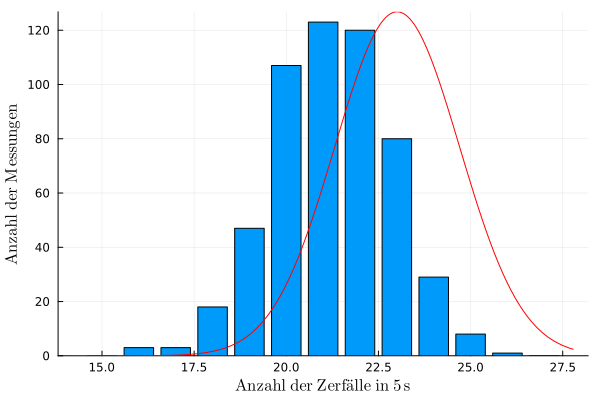

In [20]:
# Messdaten mit ΔT = 5s, binning = 8
anzahl_6_500_2 = [2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,18,47,107,123,120,80,29,8,1,0,0,0]

# Schneide interessanten Bereich hereaus
zerfälle_6_500_2 = 16:28
anzahl_6_500_2 = anzahl_6_500_2[zerfälle_6_500_2]

# Passende Gaußverteilung:
z_strich = 11044/300 # Aus Kurzmessung
m = z_strich * Δt / n
F = sum(anzahl_6_500_2)
G(x) = G(x, m, F)

# Plot
gauß1 = plot(bar(zerfälle_6_500_2.-1,anzahl_6_500_2,label=L"\mathrm{Messdaten}"), legend=:none)
plot!(G,color=:red,label=L"\mathrm{Gauß}")

xlabel!(L"\mathrm{Anzahl\ der\ Zerfälle\ in\ }5\mathrm{\,s}")
ylabel!(L"\mathrm{Anzahl\ der\ Messungen}")

In [21]:
[m,F,z_strich]

3-element Vector{Float64}:
  23.008333333333333
 539.0
  36.81333333333333

In [22]:
savefig(gauß1, "../../media/B3.1/gauss1.pdf");

Sample 6, 600V, 45min, ΔT = 5s, binning = 8:

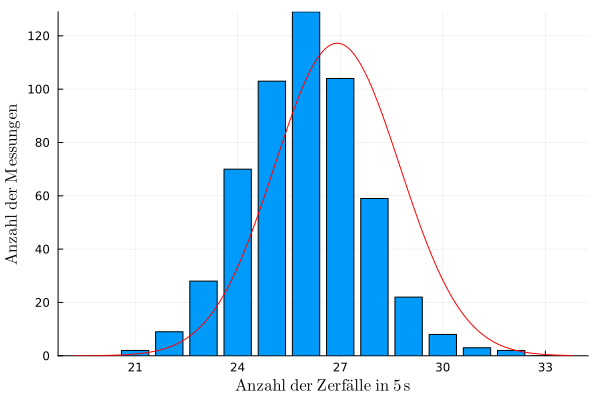

In [23]:
# Messdaten mit ΔT = 5s, binning = 8
anzahl_6_600_2 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,9,28,70,103,129,104,59,22,8,3,2,0,0]

# Schneide interessanten Bereich hereaus
zerfälle_6_600_2 = 21:34
anzahl_6_600_2 = anzahl_6_600_2[zerfälle_6_600_2]

# Passende Gaußverteilung:
z_strich = 12917/300 # Aus Kurzmessung
m = z_strich * Δt / n
F = sum(anzahl_6_600_2)
G(x) = G(x, m, F)

# Plot
gauß2 = plot(bar(zerfälle_6_600_2.-1,anzahl_6_600_2,label=L"\mathrm{Messdaten}"), legend=:none)
plot!(G,color=:red,label=L"\mathrm{Gauß}")
xlabel!(L"\mathrm{Anzahl\ der\ Zerfälle\ in\ }5\mathrm{\,s}")
ylabel!(L"\mathrm{Anzahl\ der\ Messungen}")

In [24]:
[m,F,z_strich]

3-element Vector{Float64}:
  26.910416666666666
 539.0
  43.056666666666665

In [25]:
savefig(gauß2, "../../media/B3.1/gauss2.pdf");

Sample 6 + 7, 500V, 45min, ΔT = 5s, binning = 8:

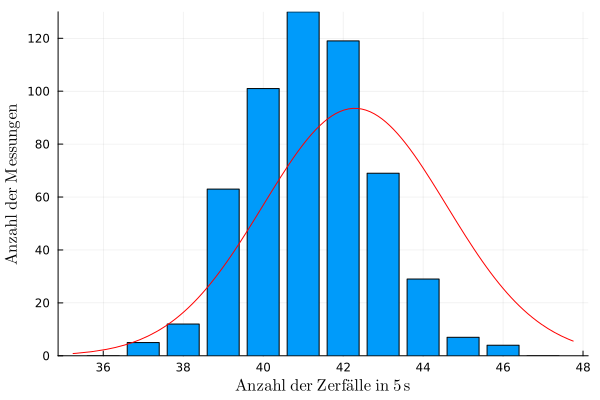

In [26]:
# Messdaten mit ΔT = 5s, binning = 8
anzahl_6und7_500_2 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,12,63,101,130,119,69,
    29,7,4,0,0]

# Schneide interessanten Bereich hereaus
zerfälle_6und7_500_2 = 37:48
anzahl_6und7_500_2 = anzahl_6und7_500_2[zerfälle_6und7_500_2]


# Passende Gaußverteilung:
z_strich = 20300/300 # Aus Kurzmessung
m = z_strich * Δt / n
F = sum(anzahl_6und7_500_2)
G(x) = G(x, m, F)

# Plot
gauß3 = plot(bar(zerfälle_6und7_500_2.-1,anzahl_6und7_500_2,label=L"\mathrm{Messdaten}"), legend=:none)
plot!(G,color=:red,label=L"\mathrm{Gauß}")
xlabel!(L"\mathrm{Anzahl\ der\ Zerfälle\ in\ }5\mathrm{\,s}")
ylabel!(L"\mathrm{Anzahl\ der\ Messungen}")

In [27]:
[m,F,z_strich]

3-element Vector{Float64}:
  42.29166666666667
 539.0
  67.66666666666667

In [28]:
savefig(gauß3, "../../media/B3.1/gauss3.pdf");

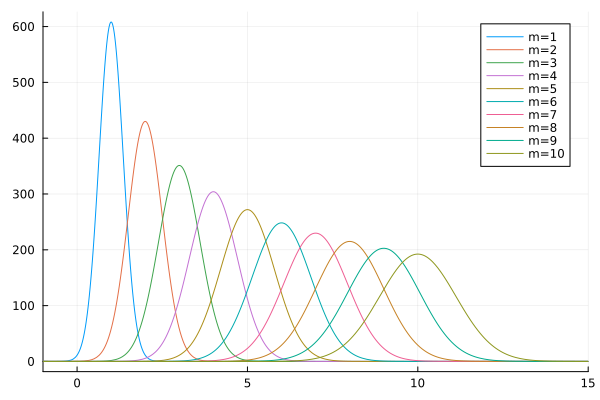

In [29]:
G(x) = G(x, m, F)
m = 1
plot(G, xaxis=[-1,15], label="m=$m")
m=2
plot!(G, label="m=$m")
m=3
plot!(G, label="m=$m")
m=4
plot!(G, label="m=$m")
m=5
plot!(G, label="m=$m")
m=6
plot!(G, label="m=$m")
m=7
plot!(G, label="m=$m")
m=8
plot!(G, label="m=$m")
m=9
plot!(G, label="m=$m")
m=10
plot!(G, label="m=$m")

## 3: Intervall-Verteilung

##### Plotten der Messwerte

In [30]:
interval0 = CSV.read("sample_6/500V_45min/interval_0.001_1.csv", DataFrame)
interval1 = CSV.read("sample_6/500V_45min/interval_0.001_2.csv", DataFrame)
interval2 = CSV.read("sample_6/500V_45min/interval_0.001_3.csv", DataFrame)
;

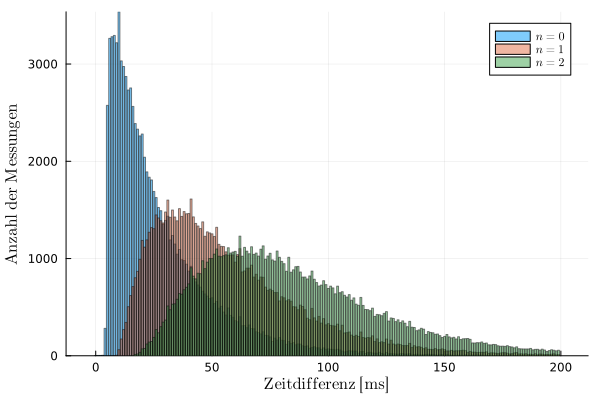

In [31]:
# Sample 6, 500V, 45min
interval = bar(interval0[1:200, :intervall], interval0[1:200, :count], alpha=0.5, label=L"n = 0")
bar!(interval1[1:200, :intervall], interval1[1:200, :count], alpha=0.5, label=L"n = 1")
bar!(interval2[1:200, :intervall], interval2[1:200, :count], alpha=0.5, label=L"n = 2")
xlabel!(L"\mathrm{Zeitdifferenz\ } [\mathrm{ms}]")
ylabel!(L"\mathrm{Anzahl\ der\ Messungen}")

In [32]:
savefig(interval, "../../media/B3.1/interval.pdf");

##### Fitten für n=0
- Alle Messwerte im Bereich t $\in$ [0,totzeit] abschneiden und den Rest fitten

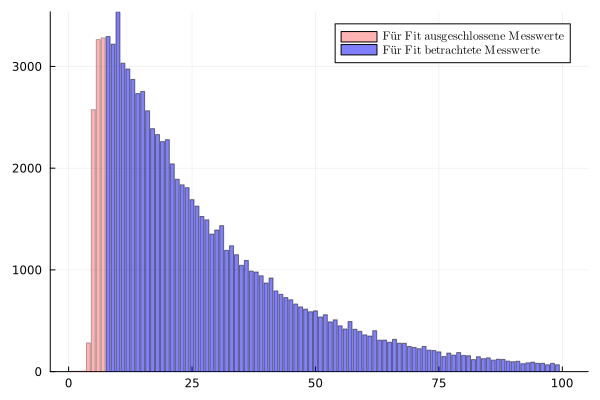

In [33]:
# Plot
totzeitIndex = 8
intervalFit = bar(interval0[1:totzeitIndex, :intervall], interval0[1:totzeitIndex, :count],
    color=:red, alpha=0.3, label=L"\mathrm{Für\ Fit\ ausgeschlossene\ Messwerte}", title="", legend=:topright)
bar!(interval0[(totzeitIndex+1):100, :intervall],
    interval0[(totzeitIndex+1):100, :count], color=:blue, alpha=0.5, label=L"\mathrm{Für\ Fit\ betrachtete\ Messwerte}", title="")

In [34]:
# Intervallverteilung mit skaliertem N (für n = 0)
a = 0.043 # Fitparameter zwischen 0.042 und 0.044
T = 2700 # s Gesamtdauer der Messung = 45 min oder letzter gemessener Zeitpunkt?
N = 1000*T * a # Normierungskonstante
I(t) = N * a * exp(- a * t)

I (generic function with 1 method)

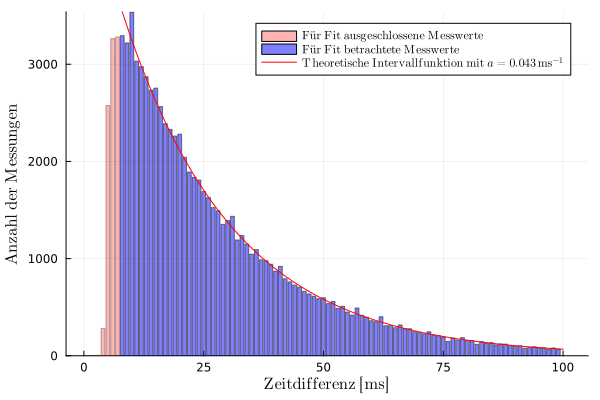

In [35]:
plot!(totzeitIndex:100,I,label=LaTeXString("\$\\mathrm{Theoretische\\ Intervallfunktion\\ mit\\ } a = $a \\mathrm{\\,ms^{-1}}\$"), color=:red)

xlabel!(L"\mathrm{Zeitdifferenz\ } [\mathrm{ms}]")
ylabel!(L"\mathrm{Anzahl\ der\ Messungen}")

In [36]:
T/1000

2.7

In [37]:
savefig(intervalFit, "../../media/B3.1/intervalFit.pdf");

## 4: Totzeit

### Aus Intervallverteilung

$$a = a^\prime / (1 - a^\prime * \tau)$$
$$\Leftrightarrow \tau = 1/a^\prime - 1/a$$

Benötigt $a$ aus der Intervallverteilung.
Falls $a$ nicht schon definiert ist, wird es hier definiert:

In [38]:
if ! isdefined(Main, :a)
    a = 0.043
end

In [39]:
a_strich = 11044/300 * 10^(-3) # ms Gemessene Zählrate aus Kurzzeitmessung
tau = 1/a_strich - 1/a # ms

3.908257035283807

#### Aus kurzen Messungen

In [40]:
short_measures = CSV.read("short_measurements.csv", DataFrame)
short_measures.rates = short_measures.count ./ short_measures.seconds
short_measures.rate_errors = sqrt.(short_measures.rates);

short_measures.rate_w_error = measurement.(short_measures.rates, short_measures.rate_errors)
short_measures

12×7 DataFrame
 Row │ sample_name  seconds  voltage  count  rates     rate_errors  rate_w_err ⋯
     │ String15     Int64    Int64    Int64  Float64   Float64      Measuremen ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ sample_6_7       300      500  20300  67.6667       8.22598      67.7±8 ⋯
   2 │ sample_6_7       300      550  25509  85.03         9.22117      85.0±9
   3 │ sample_6_7       300      600  28522  95.0733       9.75056      95.1±9
   4 │ sample_6         300      500  11044  36.8133       6.0674       36.8±6
   5 │ sample_6         300      550  12260  40.8667       6.3927       40.9±6 ⋯
   6 │ sample_6         300      600  12917  43.0567       6.56176      43.1±6
   7 │ sample_7         300      500  15833  52.7767       7.26476      52.8±7
   8 │ sample_7         300      550  17914  59.7133       7.72744      59.7±7
   9 │ sample_7         300      600  19421  64.7367       8.04591      64.7±8 ⋯
  10 │ no_sample        300      500   2396   7.98667      2.82607       8.0±2
  11 │ no_sample        300      550   2513   8.37667      2.89425       8.4±2
  12 │ no_sample        300      600   2550   8.5          2.91548       8.5±2
                                                                1 column omitted

In [41]:
function totzeit_in_milliseconds(data, voltage)
    filtered_voltage = short_measures[short_measures.voltage .== voltage, :]
    
    n6 = filtered_voltage[filtered_voltage.sample_name .== "sample_6", :rate_w_error][1]
    n7 = filtered_voltage[filtered_voltage.sample_name .== "sample_7", :rate_w_error][1]
    n67 = filtered_voltage[filtered_voltage.sample_name .== "sample_6_7", :rate_w_error][1]
    n0 = filtered_voltage[filtered_voltage.sample_name .== "no_sample", :rate_w_error][1]
    
    A = n0*n67*n7-n6*n67*n7+n0*n67*n6-n0*n6*n7
    B = -2*n67*n0+2*n6*n7
    C = n67-n6+n0-n7

    t1 = (-B+sqrt(B^2 - 4*A*C))/(2*A) * 1000
    t2 = (-B-sqrt(B^2 - 4*A*C))/(2*A) * 1000

    return t1, t2
end

totzeit_in_milliseconds (generic function with 1 method)

Ermittle realistische Totzeiten

In [42]:
tau_1 = totzeit_in_milliseconds(short_measures, 500)[1]
tau_2 = totzeit_in_milliseconds(short_measures, 550)[1]
tau_3 = totzeit_in_milliseconds(short_measures, 600)[1];

Stelle alle Totzeiten als $\LaTeX$-Tabelle dar

In [43]:
digits = 2

for voltage in (500, 550, 600)
    print("\$$voltage\$")
    for t in totzeit_in_milliseconds(short_measures, voltage)
        value = round(Measurements.value(t), digits=digits)
        uncert = round(Measurements.uncertainty(t), digits=digits)
        print(" & \$$value \\pm $uncert\$")
        perc = round(Integer, uncert / value * 100)
        print(" \$(\\pm $perc \\,\\%)\$")
    end
    println(" \\\\")
end

$500$ & $6.41 \pm 5.72$ $(\pm 89 \,\%)$ & $22.04 \pm 2.62$ $(\pm 12 \,\%)$ \\
$550$ & $2.32 \pm 4.4$ $(\pm 190 \,\%)$ & $19.79 \pm 2.12$ $(\pm 11 \,\%)$ \\
$600$ & $1.13 \pm 3.85$ $(\pm 341 \,\%)$ & $18.51 \pm 1.91$ $(\pm 10 \,\%)$ \\


## 5: Aufgaben zum  $\chi^2$–Test
Benötigt Totzeit.

Daten einlesen

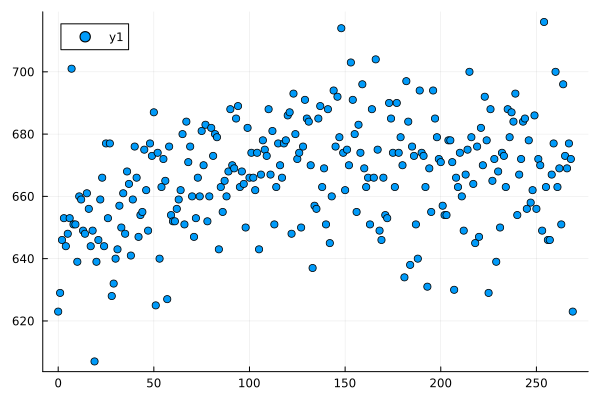

In [44]:
data = CSV.File("sample_6_7/500V_45min/divide_10.csv")
scatter(0:length(data), data.Zerfälle_in_10_sec)

In [45]:
pos_min = 0
pos_max = 50
x_data = pos_min:pos_max
decays = data.Zerfälle_in_10_sec[x_data.+1]

avg_decays = mean(decays)

653.8039215686274

In [46]:
std(decays)

16.509415020336895

In [47]:
avg_decays

653.8039215686274

In [48]:
avg_decays_corrected = avg_decays / (1 - a_strich*tau)

763.6789739437968

In [49]:
avg_decays_corrected/avg_decays

1.1680550525172038

In [50]:
decays_corrected = decays ./ (1 .- a_strich*tau);

### 1. Hypothesen
Zeigen Sie zeichnerisch, was die Hypothesen a, b und c besagen.

- a: Die Präparatstärke ist konstant im betrachteten Zeitraum und gleicht dem Mittelwert der 51 Messwerte.
- b: Die Präparatstärke ist konstant im betrachteten Zeitraum und gleicht dem Mittelwert der 51 Messwerte minus 10%.
- c: Die Präparatstärke nimmt im betrachteten Zeitraum linear mit der Zeit ab (als erste Näherung eines exponentiellen Abfalls). Die Anfangszählrate ist der Mittelwert, und der Abfall von einer Messung zur anderen sei 1.

Hypothese $H_1$: "Die Präparatstärke ist konstant im betrachteten Zeitraum und gleicht dem Mittelwert der $51$ Messwerte."

Diese Hypothese besagt, jeder erwartete Zählmenge $n_1(i)$ sei gleich dem Mittelwert der $51$ Messungen $n_i$.

$$
	\bar x = \bar n
$$
$$
    n_1(i) = \frac{1}{51} \sum_{i=1}^{51} n_i
$$
$$
	\chi^2_1 = \sum_i \frac{(n_i-\bar n)^2}{\bar n}
$$

Hypothese $H_2$: "Die Präparatstärke ist konstant im betrachteten Zeitraum und gleicht dem Mittelwert der $51$ Messwerte minus $10\%$."

Dies bedeutet, dass die erwarteten Zählungen $n_2(i)$ um $10\%$ kleiner als die Zählungen nach $H_1$ sein müssen.

$$
    n_2(i) = \frac{9}{10}\cdot n_1(i)
$$
$$
	\chi^2_2 = \sum_i \frac{(n_i-0.9\,\bar n)^2}{0.9\,\bar n}
$$

Hypothese $H_3$: "Die Präparatstärke nimmt im betrachteten Zeitraum linear mit der Zeit ab (als erste Näherung eines exponentiellen Abfalls). Die Anfangszählrate ist der Mittelwert, und der Abfall von einer Messung zur anderen sei $1$."

Die erwarteten Ereignisse starten demnach bei $n_1(0)$ und fallen dann linear mit einer Steigung von $1$ ab.

$$
    n_3(i) = n_1(0) - i
$$
$$
	\chi^2_3 = \sum_i \frac{(n_i-(n - i))^2}{(n - i)}
$$

In [51]:
function plot_hypotheses(x_data, decays, title; legend_pos)
    scatter(x_data, decays, label=L"\mathrm{Messwerte}", legend=legend_pos, yrange=[580, 830])
    
    title!(title)
    xlabel!(L"\mathrm{Zeit}\ [10\mathrm{\,s}]")
    ylabel!(L"\mathrm{Ereignisse}\ \left[(10\,\mathrm{s})^{-1}\right]")
    
    h1_results = fill(mean(decays), length(x_data))
    
    plot!(
        x_data,
        h1_results,
        label=L"H_1",
        color=:red4,
        lw=2
    )
    
    plot!(
        x_data,
        0.9 .* h1_results,
        label=L"H_2",
        color=:darkgreen,
        lw=2
    )
    
    plot!(
        x_data,
        h1_results .- x_data,
        label=L"H_3",
        color=:navy,
        lw=2
    )
end

plot_hypotheses (generic function with 1 method)

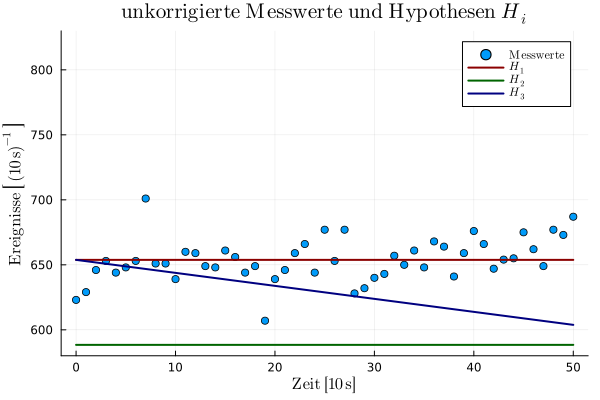

In [52]:
plot_hypotheses(x_data, decays, L"\mathrm{unkorrigierte\ Messwerte\ und\ Hypothesen\ } H_i", legend_pos=:topright)

In [53]:
savefig("../../media/B3.1/Hypothesen_plot.svg")
savefig("../../media/B3.1/Hypothesen_plot.pdf");

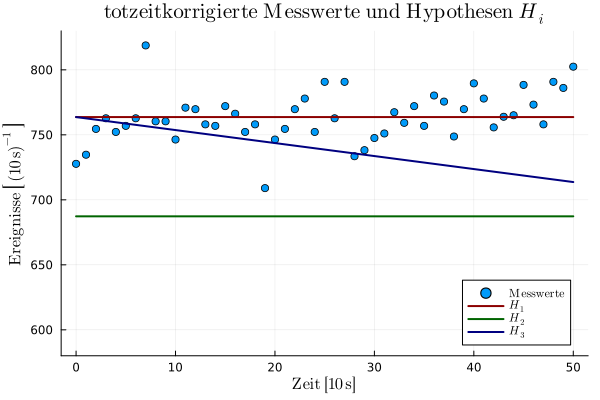

In [54]:
plot_hypotheses(x_data, decays_corrected, L"\mathrm{totzeitkorrigierte\ Messwerte\ und\ Hypothesen\ } H_i"; legend_pos=:bottomright)

In [55]:
savefig("../../media/B3.1/Hypothesen_plot_corr.svg")
savefig("../../media/B3.1/Hypothesen_plot_corr.pdf");

Man Erkennt, dass $H_1$ die Messwerte am besten beschreibt.

### 2. Hypothesentest
Nun werden die drei Hypothesen $H_i$ mithilfe des $\chi^2$–Tests geprüft. Hierzu werden $51$ Messwerte aus der $45\,\mathrm{min}$-Messung beider Proben gewählt, deren Zählungen über $10\,\mathrm s$ gemittelt werden. Dies wird sowohl für die nicht-totzeitkorrigierten als auch für die totzeitkorrigierten Daten durchgeführt.

Durch die Bildung des Mittelwertes gibt es noch $50$ statistische Freiheitsgrade. Dadurch können die erlaubten Grenzen für $\chi^2$ für ein System mit $50$ Freiheitsgraden und einer Signifikanz von $5\%$ verwendet werden $[6]$.

$$
	\chi^2_\mathrm{min} = 32.357 \\
$$
$$
	\chi^2_\mathrm{max} = 71.420
$$

#### unkorrigiert
$$
    \chi^2_1 = \sum_i \frac{(x_i-\bar x)^2}{\bar x}
$$

$$
	\chi^2_2 = \sum_i \frac{(x_i-0.9\,\bar x)^2}{0.9\,\bar x}
$$

$$
	\chi^2_3 = \sum_i \frac{(x_i-(\bar{n} - i))^2}{(\bar{n} - i)}
$$

In [56]:
chi_squared_1 = sum((decays .- avg_decays).^2 ./ avg_decays)

20.84422984644914

In [57]:
(1 - chi_squared_1 / 32.357)*100

35.58046219844504

In [58]:
chi_squared_2 = sum((decays .- 0.9*avg_decays).^2 ./ (0.9*avg_decays))

393.6491442738329

In [59]:
chi_squared_2 / 71.420

5.511749429765232

In [60]:
chi_squared_3 = sum((decays .- (avg_decays .- x_data)).^2 ./ (avg_decays .- x_data))

106.02106295610936

In [61]:
chi_squared_3 / 71.420

1.4844730181477088

#### totzeitkorrigiert

$$ \chi^2_{i, \mathrm{korr}} = \frac{1}{1 - \frac{m}{\Delta t}\tau} \cdot \chi^2_i$$

In [62]:
chi_squared_1_corrected = 1 / (1-a_strich*tau) * chi_squared_1

24.34720798797481

In [63]:
(1 - chi_squared_1_corrected / 32.357)*100

24.75443339007074

In [64]:
chi_squared_2_corrected = 1 / (1-a_strich*tau) * chi_squared_2

459.80387188812415

In [65]:
chi_squared_2_corrected / 71.420

6.438026769646095

In [66]:
chi_squared_3_corrected = 1 / (1-a_strich*tau) * chi_squared_3

123.83843825912807

In [67]:
chi_squared_3_corrected / 71.420

1.7339462091728937

### 3. Halbwertszeit
Welche Halbwertszeit ergibt sich aus der Hypothese c, wenn Sie einen zeitlichen Abstand der Messungen von 10 Sekunden annehmen als Näherung eines exponentiellen Zerfalls?

Nun soll nach Hypothese $H_3$ die Halbwertszeit $T_{1/2}$ der Proben bestimmt werden. Hierzu wird der exponentielle Zerfall durch eine lineare Kurve beschrieben. Es wird erwartet, dass diese Halbwertszeit deutlich geringer als die ca. $30\,\mathrm{yr}$ der Probe ist.

Dabei wird davon ausgegangen, dass innerhalb der Messdauer $\Delta t=10\,\mathrm{s}$ der Wert $N_0$ um $1$ sinkt. Weiterhin wird die Halbwertszeit nach Gleichung \ref{???} bestimmt. Nach Hypothese $H_3$ ist $N(0)=\bar n$ der Mittelwert der Zählraten.

In [68]:
T_12 = Integer(round(10 * log(2) / log(avg_decays/(avg_decays-1)))) # seconds
println(T_12, " seconds")

T_12_str = string("\$T_{1/2}(m^\\prime)=", Integer(round(T_12/3600)), "\\,\\mathrm{h}\\,", Integer(round(T_12%60)), "\\,\\mathrm{min}\$",)
println(T_12_str)
latexstring(T_12_str)

4528 seconds
$T_{1/2}(m^\prime)=1\,\mathrm{h}\,28\,\mathrm{min}$


L"$T_{1/2}(m^\prime)=1\,\mathrm{h}\,28\,\mathrm{min}$"

In [69]:
T_12_corr = Integer(round(10 * log(2) / log(avg_decays_corrected/(avg_decays_corrected-1)))) # seconds
println(T_12_corr, " seconds")

T_12_corr_str = string("\$T_{1/2}(m)=", Integer(round(T_12_corr/3600)), "\\,\\mathrm{h}\\,", Integer(round(T_12_corr%60)), "\\,\\mathrm{min}\$",)
println(T_12_corr_str)
latexstring(T_12_corr_str)

5290 seconds
$T_{1/2}(m)=1\,\mathrm{h}\,10\,\mathrm{min}$


L"$T_{1/2}(m)=1\,\mathrm{h}\,10\,\mathrm{min}$"